**Практическая работа №2. Метод стохастического градиента с логистической регрессией.**

На вход подаются обучающая выборка из точек и номера их кластеров.
Требуется найти вектор весов, при котором достигается минимум аппроксимированного риска.
Из полученного вектора весов строится линейный классификатор для выборки.

Начальное значение функционала = 99.71159601293279
Начальный вектор весов = [0.00177126 0.00284911 0.00020466]
Условие остановы при эпсилон, равным 1e-05
---------
688 ИТЕРАЦИЯ:
--- Функционал Q ---
Старый функционал = 0.16372799427716717
Новый функционал  = 0.16373261806039435
Разница           = 4.623783227186706e-06
--- Веса w ---
Старые веса = [ 1.62792342  2.49543151 -6.07736551]
Новые веса  = [ 1.70322298  2.51694567 -6.05585135]
Разница     = 0.007208685342949828


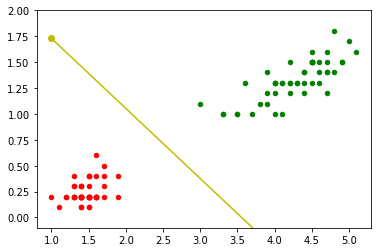

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import requests
from copy import deepcopy

RANDOM_SEED = 19
random.seed(RANDOM_SEED)

response = requests.get("https://raw.githubusercontent.com/zhenyachess/artificial_intelligence_methods/main/2/iris_cropped.json")
points = np.array(response.json())

MIN_X, MAX_X = min(points[:, 0]), max(points[:, 0])
MIN_Y, MAX_Y = min(points[:, 1]), max(points[:, 1])

LEN_POINTS = len(points)

LEN_WEIGHTS = 3
BOUND_WEIGHT = 1/(2*LEN_POINTS)

for i in range(LEN_POINTS):
  points[i][2] = -1 if points[i][2] == 0 else points[i][2]

res = points[:, 2].copy()
w = np.array([random.uniform(-BOUND_WEIGHT, BOUND_WEIGHT) for _ in range(LEN_WEIGHTS)])

EPS = 0.00001
_LAMBDA = 1 / LEN_POINTS

points[:, 2] = 1.0


def line(weights, x0):
    return -(weights[0]*x0 + weights[2])/weights[1]


def sigma(x):
    return 1 / (1 + math.exp(-x))


def calculate_net(point, weights):
    return np.dot(point, weights)


def calculate_w(l_rate, weights, point, need_res):
    return weights + l_rate * need_res * point * sigma(-calculate_net(point, weights) * need_res)


def loss(x):
    return math.log2(1 + math.exp(-x))


def diff_norm(v1, v2):
    return abs(np.linalg.norm(v1) - np.linalg.norm(v2))


def calculate_q(q, _lambda, err):
    return (1 - _lambda) * q + _lambda * err


Q = sum(loss(calculate_net(p, w) * res) for p, res in zip(points, res))

print(f"Начальное значение функционала = {Q}")
print(f"Начальный вектор весов = {w}")
print(f"Условие остановы при эпсилон, равным {EPS}")

GEN_CNT = 0
while True:
    # Выбираем случайный объект из выборки
    i = random.randint(0, LEN_POINTS-1)
    # Вычисляем выходное значение алгоритма
    net = calculate_net(points[i], w)
    # Вычисляем ошибку
    error = loss(net * res[i])
    # Сохраняем веса с предыдущего шага
    w_prev = deepcopy(w)
    # Сохраняем значение функционала с предыдущего шага
    q_prev = Q
    # Делаем шаг градиентного спуска
    w = calculate_w(0.2, w, points[i], res[i])
    # Оцениваем значение функционала
    Q = calculate_q(Q, _LAMBDA, error)

    GEN_CNT += 1

    # Правило остановы при стабилизации весов или функционала
    if abs(Q - q_prev) < EPS or diff_norm(w, w_prev) < EPS:
        print(f"---------\n{GEN_CNT} ИТЕРАЦИЯ:")

        print("--- Функционал Q ---")
        print(f"Старый функционал = {q_prev}")
        print(f"Новый функционал  = {Q}")
        print(f"Разница           = {abs(Q-q_prev)}")

        print("--- Веса w ---")
        print(f"Старые веса = {w_prev}")
        print(f"Новые веса  = {w}")
        print(f"Разница     = {diff_norm(w_prev, w)}")    
        break


res = []
for point in points:
    value = calculate_net(point, w)
    if np.sign(value) > 0:
        plt.scatter(point[0], point[1], c='g', s=20)
    else:
        plt.scatter(point[0], point[1], c='r', s=20)
    res.append(np.sign(value))


x1 = [MIN_X, MAX_X]
y1 = [line(w, x1[0]), line(w, x1[1])]
plt.plot(x1, y1, marker='o', c='y')
plt.xlim([MIN_X-0.2, MAX_X+0.2])
plt.ylim([MIN_Y-0.2, MAX_Y+0.2])
plt.show()
 